<a href="https://colab.research.google.com/github/pasmala2004/Heart-Disease-Prediction-Model/blob/main/Heart_Disease_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset from UCI repository
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)

# Split data
X = heart_disease.data.features
y = heart_disease.data.targets

# Handle missing values by fill null
X = X.ffill()
y = y.ffill()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Perform data encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
X = X.apply(le.fit_transform)

# Standardize numerical features
st = StandardScaler()
X = pd.DataFrame(st.fit_transform(X), columns=X.columns)
#y = pd.DataFrame(st.fit_transform(y))


In [18]:
# Exploratory Data Analysis (EDA)
print('Head of DataFrame:')
print(X.head())
print('\nInfo:')
print(X.info())
print('\nDescribe:')
print(X.describe())
print('\nMissing values:')
print(X.isnull().sum())

Head of DataFrame:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.963007  0.686202 -2.251775  0.843525 -0.244854  2.394438  1.016684   
1  1.413475  0.686202  0.877985  1.686124  0.979501 -0.417635  1.016684   
2  1.413475  0.686202  0.877985 -0.748049 -0.349054 -0.417635  1.016684   
3 -1.965039  0.686202 -0.165268  0.000927  0.171948 -0.417635 -0.996749   
4 -1.514571 -1.457296 -1.208521  0.000927 -1.000306 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.005469 -0.696631  1.180512  2.274579 -0.724272  0.172978  
1 -1.851851  1.435481  0.502141  0.649113  2.456228 -0.875270  
2 -0.952332  1.435481  1.471242  0.649113  1.396061  1.221227  
3  1.651541 -0.696631  2.149612  2.274579 -0.724272 -0.875270  
4  1.036081 -0.696631  0.405231 -0.976352 -0.724272 -0.875270  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dty

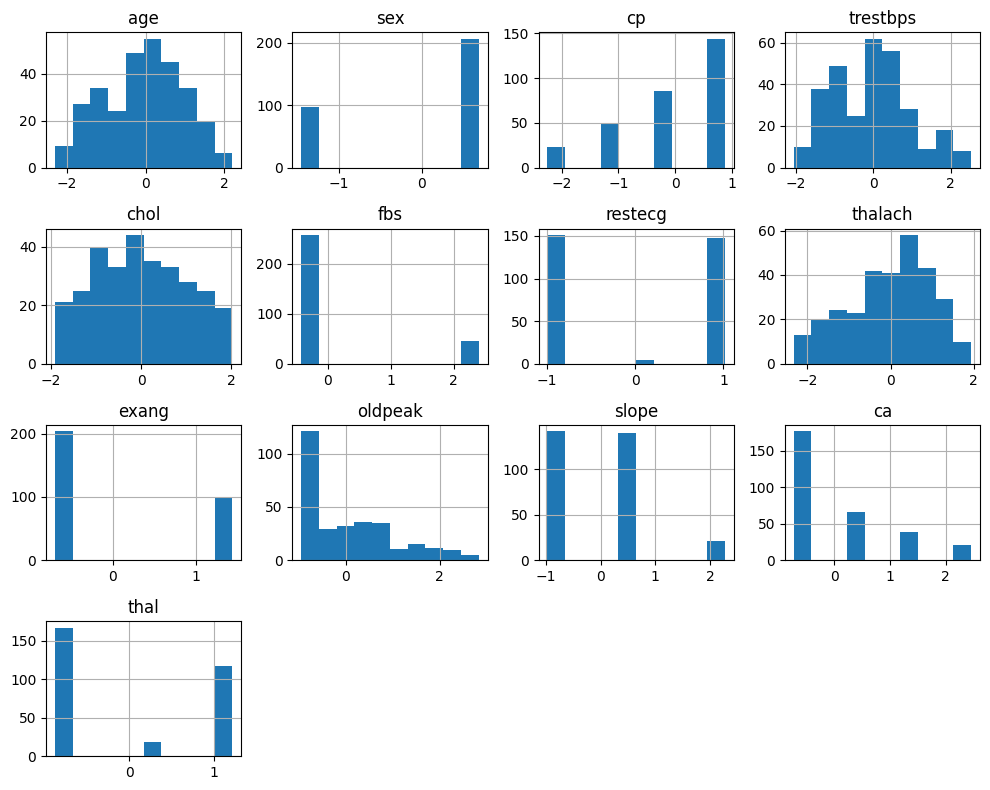

In [10]:
# Histograms Pairplot for numerical features
X.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

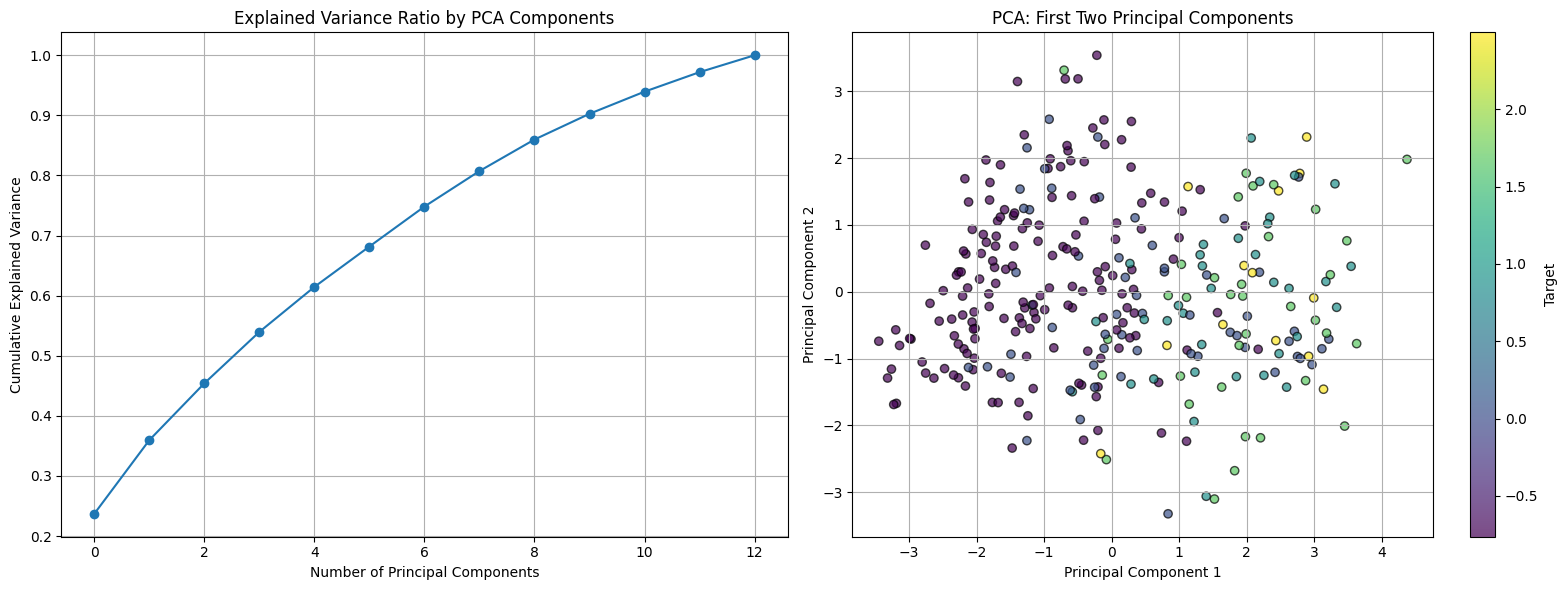

In [9]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio and PCA scatter plot as subplots
explained_variance = pca.explained_variance_ratio_
# Cumulative explained variance plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(np.cumsum(explained_variance), marker='o')
axes[0].set_xlabel('Number of Principal Components')
axes[0].set_ylabel('Cumulative Explained Variance')
axes[0].set_title('Explained Variance Ratio by PCA Components')
axes[0].grid(True)

# PCA scatter plot
sc = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].set_title('PCA: First Two Principal Components')
axes[1].grid(True)
plt.colorbar(sc, ax=axes[1], label='Target')

plt.tight_layout()
plt.show()

Feature importances from Random Forest:
thalach     0.240679
oldpeak     0.216468
chol        0.197426
age         0.178069
trestbps    0.167359
dtype: float64
Top 5 ranked features: Index(['thalach', 'oldpeak', 'chol', 'age', 'trestbps'], dtype='object')
Top 5 features by RFE: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


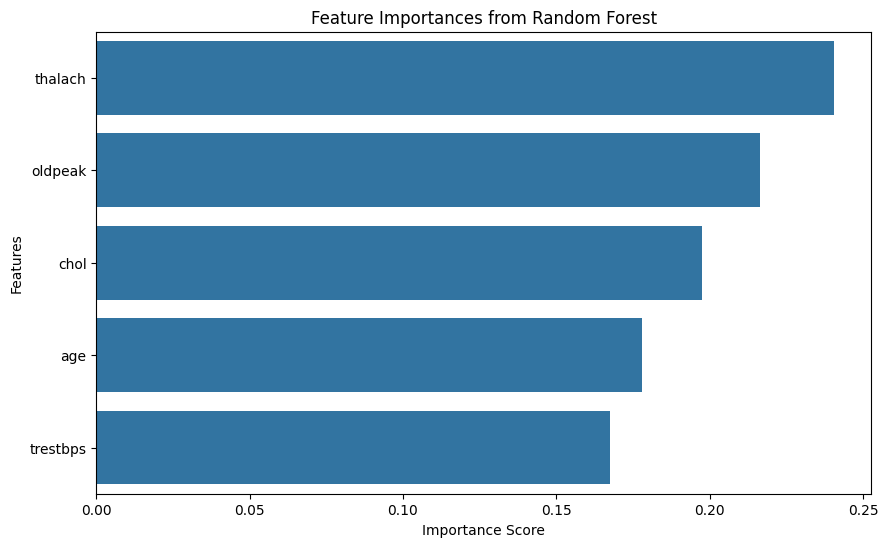

In [22]:

#feature selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
# RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y = y.values.ravel())
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print('Feature importances from Random Forest:')
print(feature_importances)

# rank features based on importance scores
ranked_features = feature_importances.index.tolist()
X_ranked = X[ranked_features]
print('Top 5 ranked features:', X_ranked.columns[:5])

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=5)
rfe.fit(X, y = y.values.ravel())
selected_rfe = [name for name, selected in zip(feature_names, rfe.support_) if selected]
print('Top 5 features by RFE:', selected_rfe)

# Chi-Square Test
if (X >= 0).all().all():
    chi2_selector = SelectKBest(chi2, k=5)
    chi2_selector.fit(X, y = y.values.ravel())
    chi2_features = [feature_names[i] for i in chi2_selector.get_support(indices=True)]
    print('Top 5 features by Chi-Square:', chi2_features)

X = X[selected_rfe]
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.show()

In [24]:
# Supervied learning models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True)
}

plt.figure(figsize=(8,6))
models_acc = {}
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    models_acc[name] = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    print(f"\n{name} Results:")
    print(f"Accuracy: {models_acc[name]:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"AUC: {auc:.3f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
Accuracy: 0.541
Precision: 0.287
Recall: 0.327
F1-score: 0.303
AUC: 0.783

Decision Tree Results:
Accuracy: 0.508
Precision: 0.274
Recall: 0.284
F1-score: 0.278
AUC: 0.574

Random Forest Results:
Accuracy: 0.492
Precision: 0.198
Recall: 0.232
F1-score: 0.212
AUC: 0.775

SVM Results:
Accuracy: 0.475
Precision: 0.095
Recall: 0.200
F1-score: 0.129
AUC: 0.805


<Figure size 800x600 with 0 Axes>

K-Means Cluster Centers: [[ 0.69575111  0.46624246  0.31191846 -0.65626031  0.59832804]
 [-0.55166064 -0.36968337 -0.24731996  0.52034841 -0.47441395]]


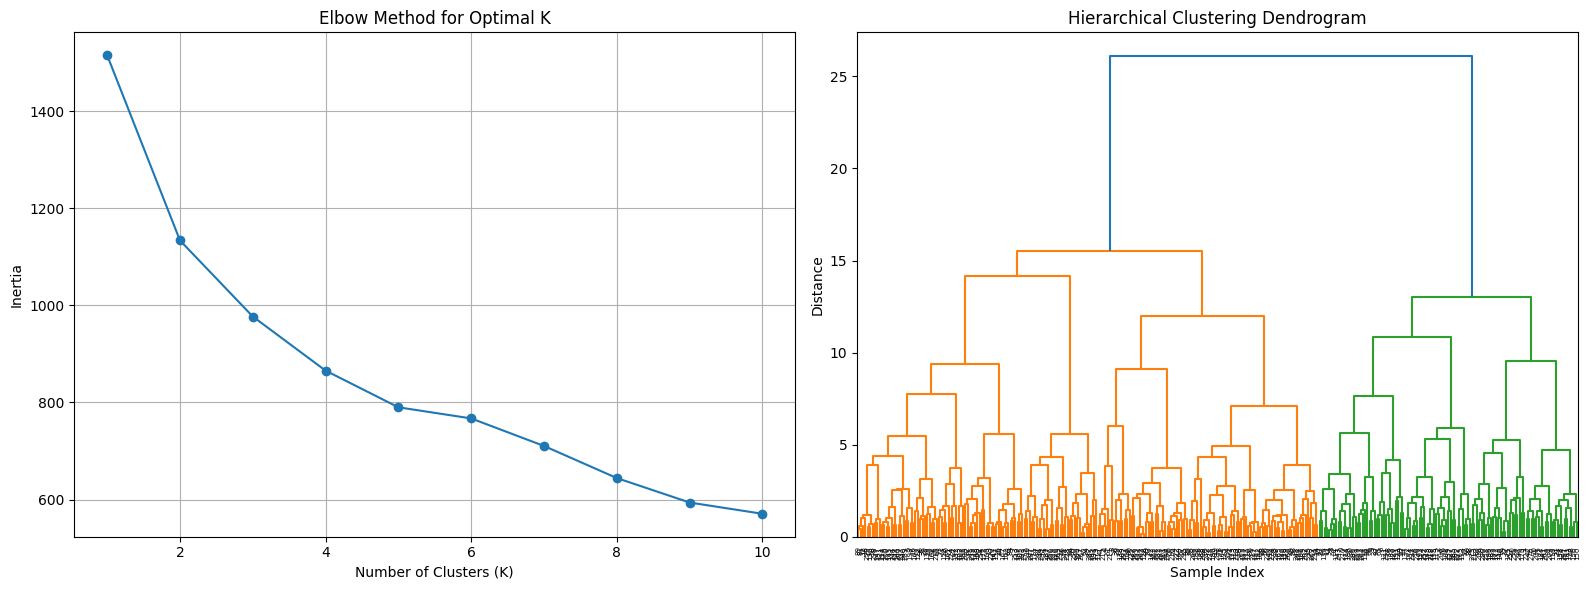

In [25]:
#unsupervied learning models

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# K-Means Clustering -> elbow method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig , axe = plt.subplots(1,2, figsize=(16,6))
axe[0].plot(K_range, inertia, marker='o')
axe[0].set_xlabel('Number of Clusters (K)')
axe[0].set_ylabel('Inertia')
axe[0].set_title('Elbow Method for Optimal K')
axe[0].grid(True)

# From the elbow plot, choose K=2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)
print('K-Means Cluster Centers:' , kmeans.cluster_centers_)

# herarchical clustering
linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
axe[1].set_title('Hierarchical Clustering Dendrogram')
axe[1].set_xlabel('Sample Index')
axe[1].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [26]:
# Hyperparameter optimization and model comparison
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train.values.ravel())
grid_pred = grid_rf.predict(X_test)
grid_acc = accuracy_score(y_test, grid_pred)
print('GridSearchCV Best Params:', grid_rf.best_params_)

# RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15]
}
random_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_rf.fit(X_train, y_train.values.ravel())
random_pred = random_rf.predict(X_test)
random_acc = accuracy_score(y_test, random_pred)
print('RandomizedSearchCV Best Params:', random_rf.best_params_)

# Compare all results
print('\nModel Comparison:')
print(f'Baseline Accuracy: {models_acc["Random Forest"]:.4f}')
print(f'GridSearchCV Accuracy: {grid_acc:.4f}')
print(f'RandomizedSearchCV Accuracy: {random_acc:.4f}')


GridSearchCV Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RandomizedSearchCV Best Params: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 15}

Model Comparison:
Baseline Accuracy: 0.4918
GridSearchCV Accuracy: 0.4918
RandomizedSearchCV Accuracy: 0.5082


In [27]:
# Save trained model and pipeline for reproducibility
import joblib
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

pipeline.fit(X, y.values.ravel())

# Save pipeline to .pkl file
joblib.dump(pipeline, 'model_pipeline.pkl')
print('Model pipeline saved as model_pipeline.pkl')


Model pipeline saved as model_pipeline.pkl
